In [125]:
# Import required libraries and dependencies
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [126]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [127]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [128]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [129]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [130]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Copy the crypto names from the original data

# Set the coinid column as index
df_scaled.index = df_market_data.index

# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [131]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,12))


In [132]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    
    kmeans.fit(df_scaled)
    
    inertia_values.append(kmeans.inertia_)
    
inertia_values

[287.0,
 198.5718180979813,
 123.19048183836958,
 79.02243535120975,
 65.30237914162498,
 52.10180599356482,
 46.03525005555019,
 37.284806594046614,
 32.16141710107241,
 28.075252677898867,
 23.89004435537795]

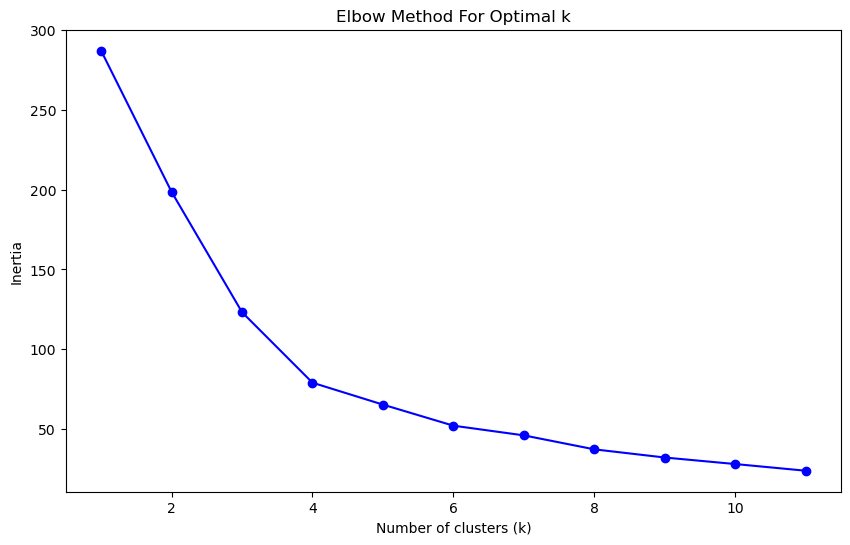

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.101806
6,7,46.035250
7,8,37.284807
8,9,32.161417
9,10,28.075253


In [133]:
# Define your k_values and inertia_values first
k_values = [1,2,3,4,5,6,7,8,9,10,11]
inertia_values = [287.0, 198.5718180979813, 123.19048183836958, 79.02243535120975, 65.30237914162498, 52.10180599356482, 46.03525005555019, 37.284806594046614, 32.16141710107241, 28.075252677898867, 23.89004435537795]

# Then create the elbow_data dictionary
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Now plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(elbow_data['k'], elbow_data['inertia'], 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Finally, create the DataFrame
elbow_data_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_data_df


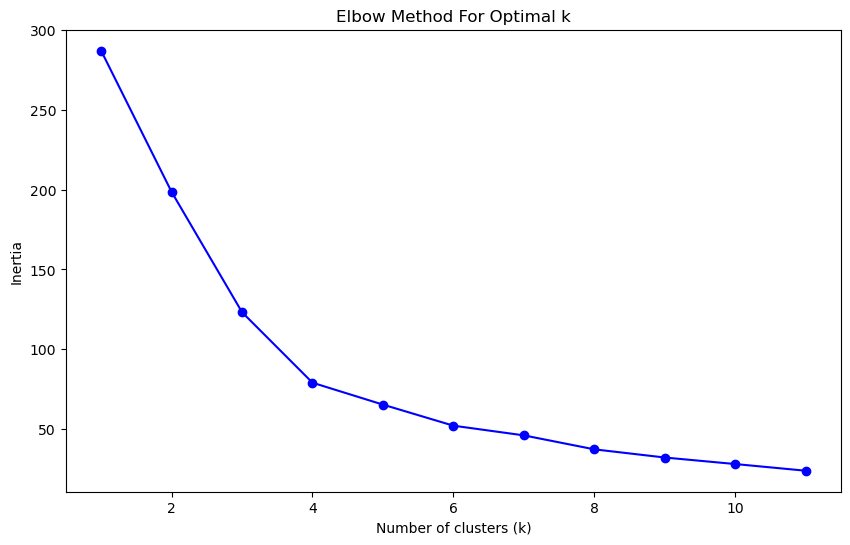

In [134]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10,6))
plt.plot(elbow_data['k'], elbow_data['inertia'], 'bo-')  # Blue dots connected by lines
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**4** 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [135]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=0)

In [136]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [137]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters= kmeans_model.predict(df_scaled)
df_scaled['cluster'] = clusters
# Print the resulting array of cluster values.
clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [138]:
# Create a copy of the DataFrame
df_scaled_copy = df_scaled.copy()

df_scaled_copy['cluster'] = clusters

In [139]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled_copy['predicted_cluster'] = clusters


# Display sample data
df_scaled_copy

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster,predicted_cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2,2


In [140]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='predicted_cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters based on 24h and 7d Price Change'
)

scatter_plot



:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [141]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

pca_data = pca_model.fit_transform(df_scaled)

In [142]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_transformed_data = pca_model.fit_transform(df_scaled)

df_pca = pd.DataFrame(
    pca_transformed_data,
    columns=['PC1', 'PC2', 'PC3']
)
# View the first five rows of the DataFrame. 
df_pca.head()

,PC1,PC2,PC3
0,1.194082,-0.902074,-0.585338
1,1.009706,-0.663584,-1.136950
2,-0.722536,-0.307632,0.721813
3,-0.748266,-0.332379,0.558479
4,2.258539,-1.826966,-1.378166


In [143]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

explained_variance

array([0.37269822, 0.32489961, 0.18917649])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

0.88777432

In [159]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data

# List the column names in the original data

# Ensure both DataFrames have the same number of rows
# Copy the 'coin_id' from df_scaled_copy to df_pca

# Ensure both DataFrames have the same number of rows
# Copy 'coin_id' from the index of df_scaled to df_pca
df_pca['coin_id'] = df_scaled.index

# Set 'coin_id' as the index of df_pca
df_pca.set_index('coin_id', inplace=True)

# Display the first few rows to verify
print(df_pca.head())



                   PC1       PC2       PC3
coin_id                                   
bitcoin       1.194082 -0.902074 -0.585338
ethereum      1.009706 -0.663584 -1.136950
tether       -0.722536 -0.307632  0.721813
ripple       -0.748266 -0.332379  0.558479
bitcoin-cash  2.258539 -1.826966 -1.378166


---

### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,12))
k_values

In [160]:
# Create an empty list to store the inertia values
k_values = list(range(1,12))

inertia_values= []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    
    model.fit(df_pca)
    
    inertia_values.append(model.inertia_)
    
inertia_values

[290.01845681615134,
 199.10805307785137,
 112.40120116244465,
 43.58643281714776,
 32.25526672583501,
 23.915930713915326,
 18.509832339666627,
 15.65314660766303,
 11.939563924562226,
 9.189483019857114,
 7.4907958274814215]

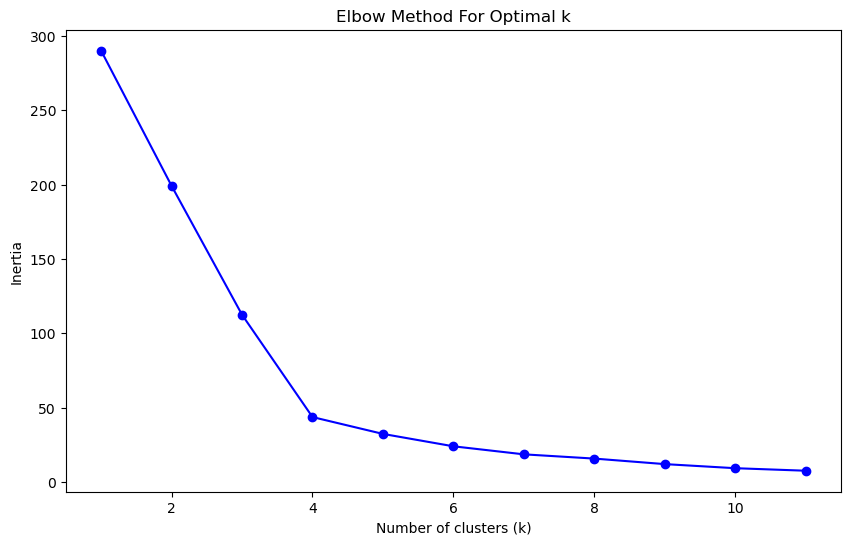

,k,inertia
0,1,290.018457
1,2,199.108053
2,3,112.401201
3,4,43.586433
4,5,32.255267
5,6,23.915931
6,7,18.509832
7,8,15.653147
8,9,11.939564
9,10,9.189483


In [162]:
# Create a dictionary with the data to plot the Elbow curve

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, 'bo-') # Blue dots connected by lines
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


# Create a DataFrame with the data to plot the Elbow curve
elbow_data = pd.DataFrame({
    'k': k_values,
    'inertia': inertia_values
})

(elbow_data)



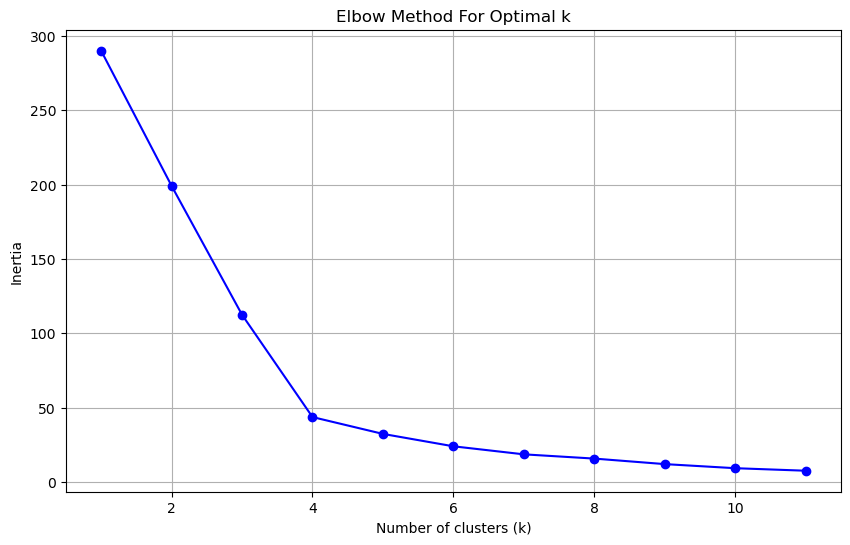

In [163]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plotting the line chart for the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_data['k'], elbow_data['inertia'], 'bo-')  # Blue dots connected by lines
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  4


* **Question:** Does it differ from the best k value found using the original data?

  no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [164]:
# Initialize the K-Means model using the best value for k
optimal_k = 4

kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)

In [165]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca)

KMeans(n_clusters=4, random_state=0)

In [167]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values.
cluster_labels

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

In [168]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['predicted_clusters'] = cluster_labels

# Display sample data
df_pca_copy.head

<bound method NDFrame.head of                            PC1       PC2       PC3  predicted_clusters
coin_id                                                               
bitcoin               1.194082 -0.902074 -0.585338                   1
ethereum              1.009706 -0.663584 -1.136950                   1
tether               -0.722536 -0.307632  0.721813                   0
ripple               -0.748266 -0.332379  0.558479                   0
bitcoin-cash          2.258539 -1.826966 -1.378166                   1
binancecoin           1.719188 -0.993613 -0.663561                   1
chainlink             1.396401 -0.721542 -2.731341                   1
cardano               1.359187 -0.651114 -1.482162                   1
litecoin              0.869062 -0.828724 -0.856779                   1
bitcoin-cash-sv      -0.763186 -0.619275  0.315895                   0
crypto-com-chain     -1.795991  0.250828  0.984707                   0
usd-coin             -0.733773 -0.310013  0.737

In [171]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Import hvplot.pandas if it's not already imported


scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='predicted_clusters',  # Corrected column name
    hover_cols=['coin_id'],
    colormap='Category10',  # This sets distinct colors for different clusters
    title='PCA Clusters of Cryptocurrencies'
)
scatter_plot

:NdOverlay   [predicted_clusters]
   :Scatter   [PC1]   (PC2,coin_id)

In [173]:
inertia_values_pca = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df_pca)
    inertia_values_pca.append(model.inertia_)


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

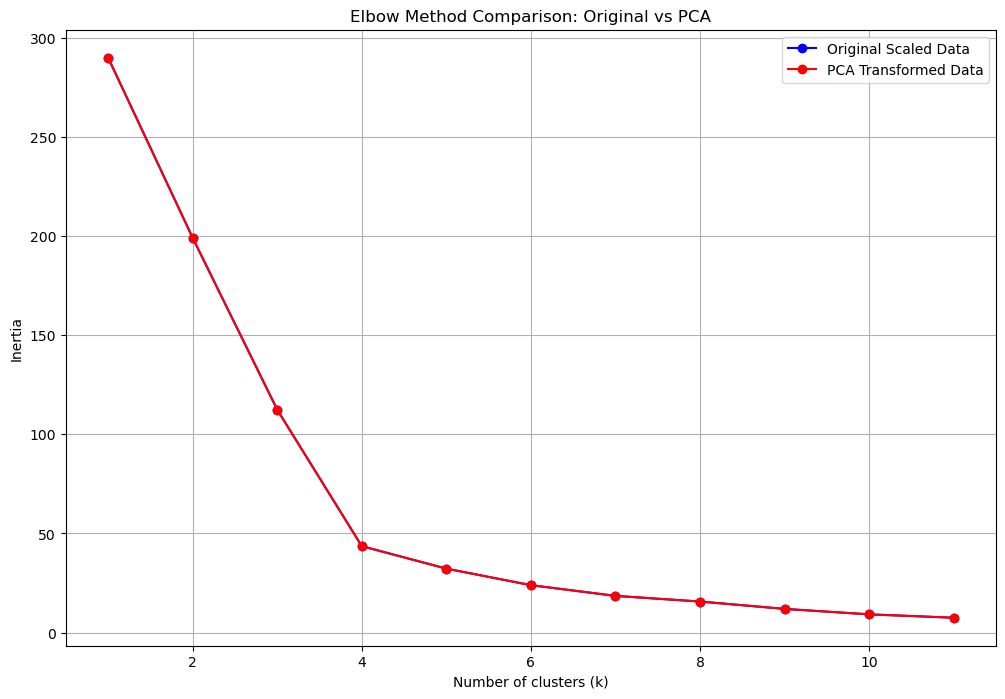

In [174]:
# Composite plot to contrast the Elbow curves

elbow_data_pca = {'k': k_values, 'inertia': inertia_values_pca}

# Plotting the composite elbow curve
plt.figure(figsize=(12, 8))
plt.plot(elbow_data['k'], elbow_data['inertia'], 'bo-', label='Original Scaled Data')
plt.plot(elbow_data_pca['k'], elbow_data_pca['inertia'], 'ro-', label='PCA Transformed Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method Comparison: Original vs PCA')
plt.legend()
plt.grid(True)
plt.show()


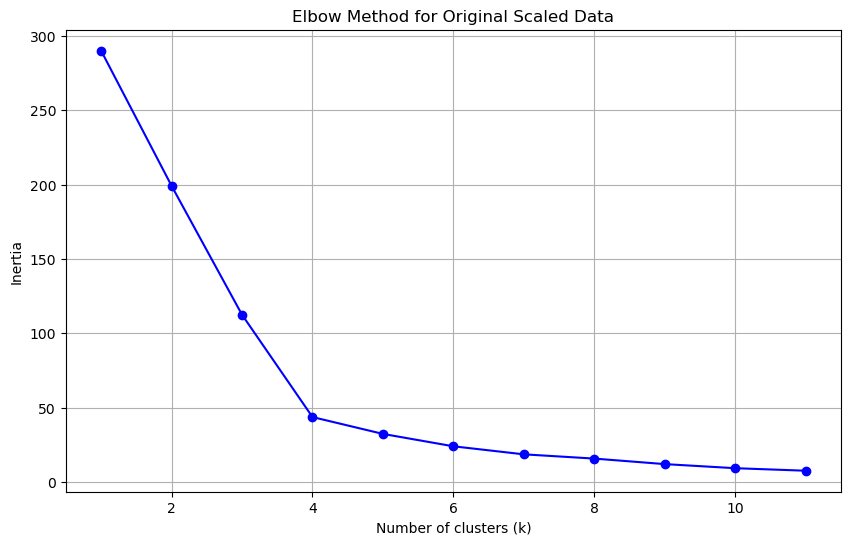

In [176]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!


plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, 'bo-')  # Blue dots connected by lines
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Original Scaled Data')
plt.grid(True)
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * no change